# Apple App Data - Analysis: Project 1

In [1]:
import openpyxl as xl
from pprint import pprint
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
from langdetect import detect_langs, LangDetectException

In [2]:
wb = xl.load_workbook(filename = '/Users/galbeeir/Desktop/Courses/Python/Project_1 /Apple App Data.xlsx')

In [3]:
wb.sheetnames

['AppleData']

In [4]:
apple = wb['AppleData']

In [5]:
def column_printer(sheet, column):
    for i in range(1, sheet.max_row + 1):
        print(f'{column}{i}', sheet[f'{column}{i}'].value)

In [6]:
apple_data = {
    apple[f'A{data}'].value:
    [
        str(apple[f'B{data}'].value),
        apple[f'C{data}'].value,
        apple[f'D{data}'].value,
        apple[f'E{data}'].value,
        apple[f'F{data}'].value,
        apple[f'G{data}'].value,
        apple[f'H{data}'].value,
        apple[f'I{data}'].value,
        apple[f'J{data}'].value,
        apple[f'K{data}'].value,
        apple[f'L{data}'].value,
        apple[f'M{data}'].value,
        apple[f'N{data}'].value
    ]
    for data in range(2, apple.max_row +1)
}

In [12]:
def aggregation(column_index, column_to_sum, dictionary): 
    
    category_sums = {}

    for order in dictionary.values():
    
        category = order[column_index]
    
        category_sums[category] = category_sums.get(category, 0) + order[column_to_sum]
    
    return category_sums

In [24]:
# column_printer(apple, 'C')

In [34]:
aggregation(1, 4, apple_data)

{'ro': 228.37000000000035,
 'en': 7018.039999999728,
 'da': 113.55999999999987,
 'id': 146.58999999999997,
 'pt': 511.1100000000005,
 None: 1820.7900000000043,
 'nl': 119.64999999999992,
 'sk': 14.940000000000001,
 'de': 919.1600000000012,
 'tl': 164.4800000000001,
 'it': 249.4100000000002,
 'es': 68.78,
 'pl': 21.899999999999995,
 'fr': 95.68999999999997,
 'af': 90.68999999999996,
 'sv': 108.5199999999999,
 'sw': 123.72999999999993,
 'no': 85.78999999999996,
 'cy': 101.73999999999997,
 'ca': 173.62000000000003,
 'fi': 28.91,
 'lt': 40.87000000000001,
 'so': 49.83000000000001,
 'vi': 9.940000000000001,
 'tr': 37.88000000000001,
 'lv': 2.98,
 'cs': 6.970000000000001,
 'sl': 6.94,
 'et': 10.930000000000001,
 'hu': 12.98,
 'sq': 5.98,
 'hr': 32.81999999999999}

In [7]:
def detect_language(text):
    try:
        # The detect_langs takes two arguments, posssible language and probability of that language
        langs = detect_langs(text)
        
        for lang in langs: # Starting a for loop to iterate through each instance/cell within a given database(column)
            
            if lang.prob > 0.8: #If the probability of that language to be true is higher than 50% return the language
                return lang.lang
            
        return None # If the probability of the language is lower than 50% than return None object
    
    except LangDetectException: # For the exception cases, where languages can't be detected, return None object
        return None

In [8]:
for data in apple_data.values():
    data.insert(1, detect_language(data[0]))

In [9]:
for i, data in enumerate(apple_data.values(), start=2):
    apple[f'P{i}'] = data[1]

In [11]:
ap = pd.read_excel('/Users/galbeeir/Desktop/Courses/Python/Project_1 /updated_project2.xlsx')
ap.head()
ap.describe()

,App_ID,Size_(Bytes),Price,Total_Ratings,Avg_Rating,Current Version_Ratings,Current_version_Avg_Rating,Supported_Devices,Number_of_Screenshots,Supported_Languages,Counter
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.0
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,3.526956,460.373906,3.253578,37.361817,3.707100,5.434903,1.0
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,1.517948,3920.455183,1.809363,3.737715,1.986005,7.919593,0.0
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.0
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,3.500000,1.000000,2.500000,37.000000,3.000000,1.000000,1.0
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,4.000000,23.000000,4.000000,37.000000,5.000000,1.000000,1.0
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,4.500000,140.000000,4.500000,38.000000,5.000000,8.000000,1.0
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,5.000000,177050.000000,5.000000,47.000000,5.000000,75.000000,1.0


In [13]:
sum_ratings = ap.groupby('Primary_Genre')['Total_Ratings'].sum()
sum_ratings = sum_ratings.sort_values(ascending=False)

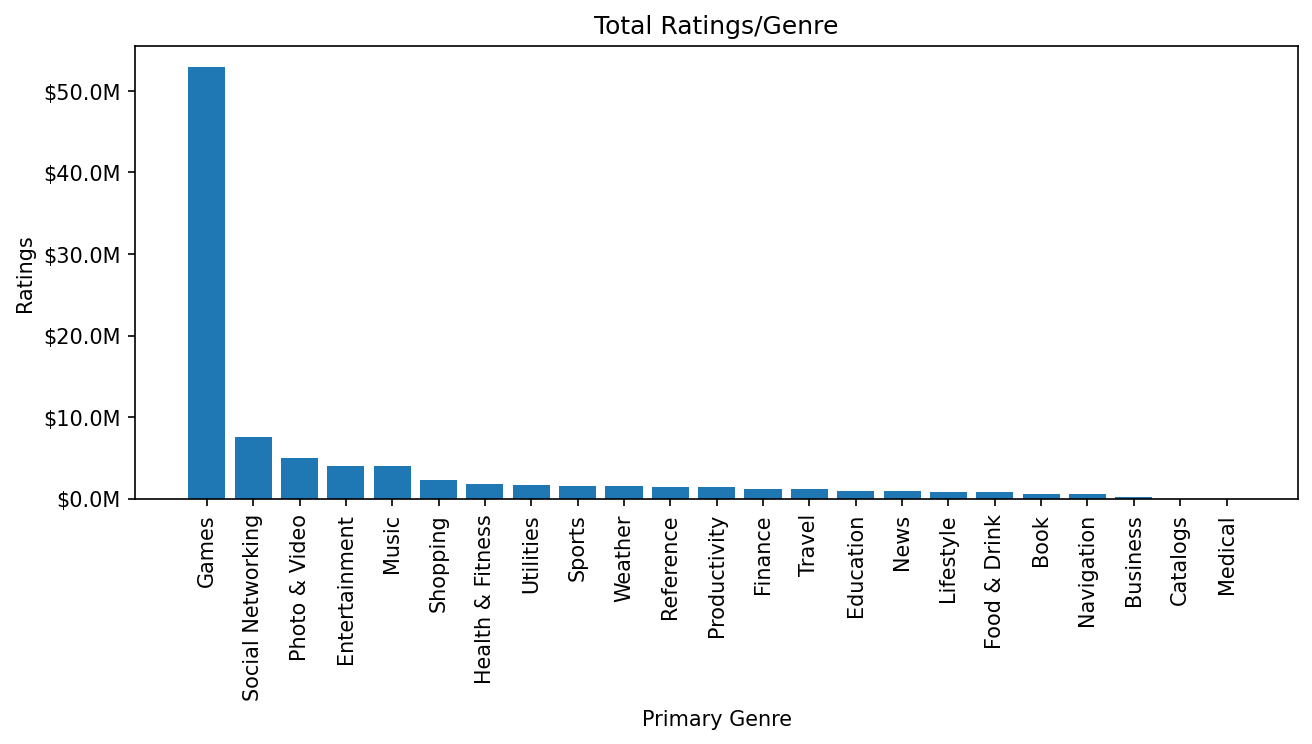

In [14]:
plt.rcParams['font.size']=10
plt.rcParams['figure.dpi']=150
plt.rcParams['figure.figsize']= (10, 4)
fig, ax = plt.subplots()
ax.bar(sum_ratings.index, sum_ratings.values)

def millions_formatter(x, pos):
    return f'${x/1000000:.1f}M'

ax.yaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))

ax.set_xlabel('Primary Genre')
ax.set_ylabel('Ratings')
ax.set_title('Total Ratings/Genre')
plt.tick_params(axis='x', labelrotation = 90)
plt.show()

In [15]:
def millions_formatter_varb(x, pos):
    return f'{x/1000000:.1f}M'

In [16]:
def dollar_formater(x, pos):
    return f'${x:,.0f}'

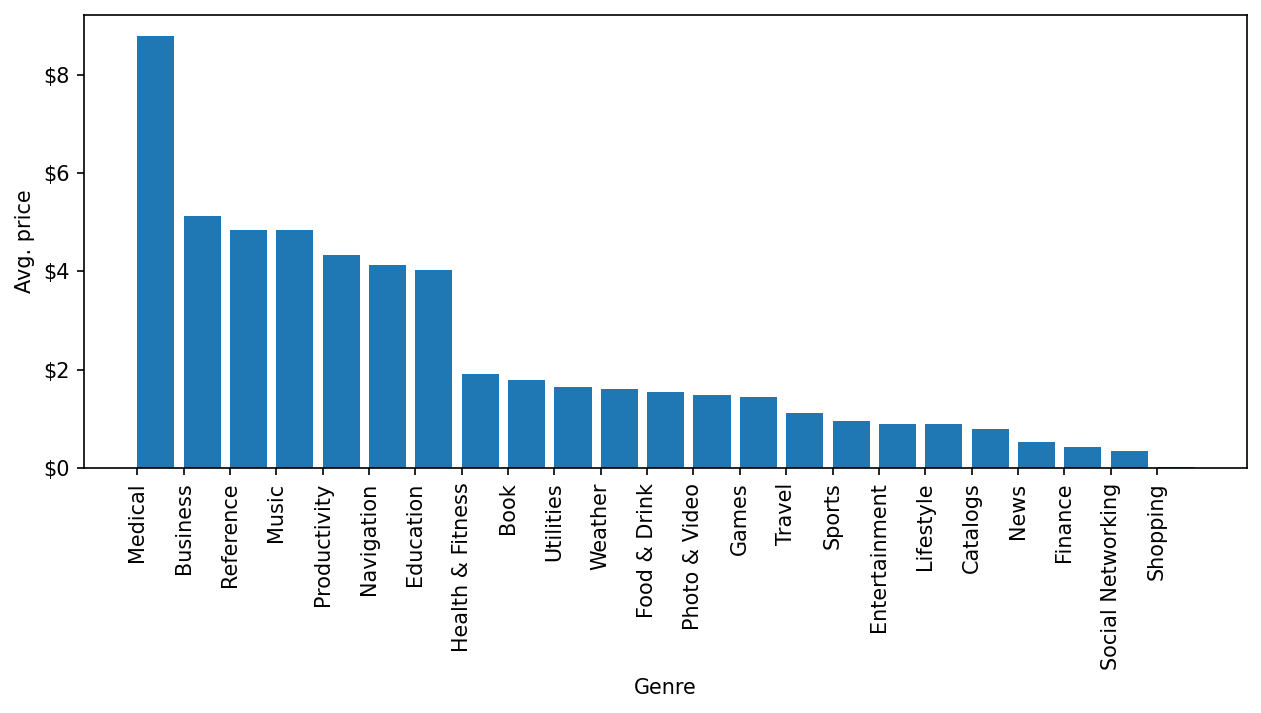

In [17]:
avg_price = ap.groupby('Primary_Genre')['Price'].mean()
avg_price = avg_price.sort_values(ascending=False)
fig, ax = plt.subplots()
ax.bar(avg_price.index, avg_price.values, width=0.8, align='edge')

ax.set_xlabel('Genre')
ax.set_ylabel('Avg. price')
plt.tick_params(axis='x', labelrotation = 90)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(dollar_formater))

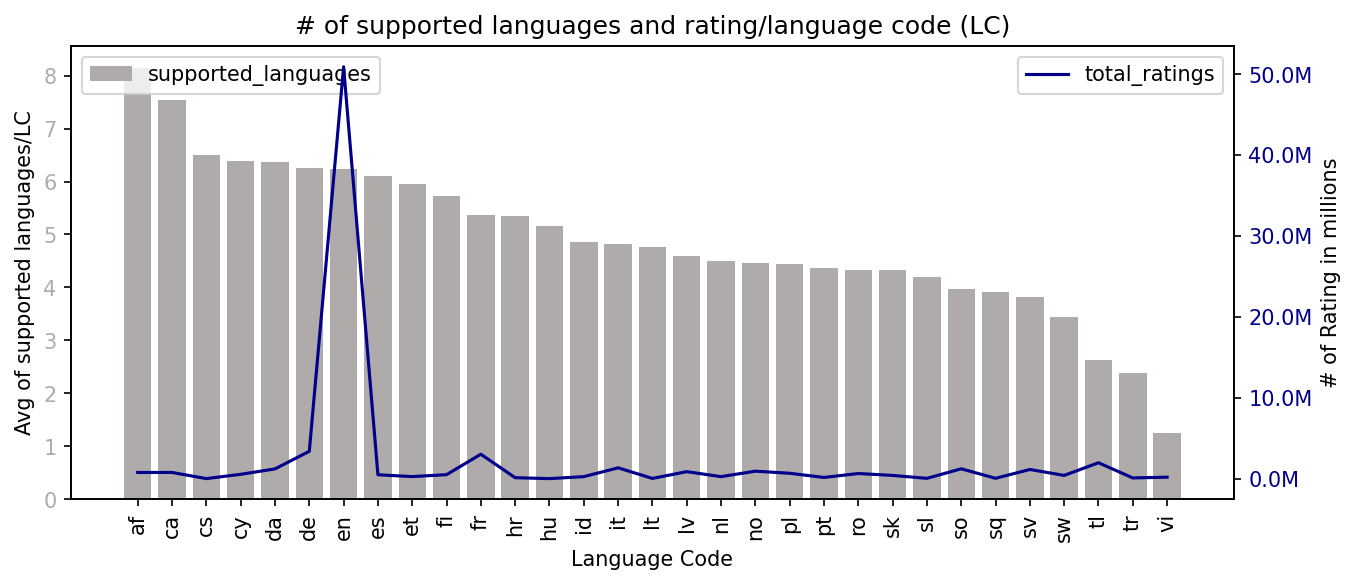

In [18]:
total_ratings = ap.groupby('Language_code')['Total_Ratings'].sum()
supported_languages = ap.groupby('Language_code')['Supported_Languages'].mean()
supported_languages = supported_languages.sort_values(ascending=False)

#Create figure and axis objects
fig, ax1 = plt.subplots()

# Create a bar chart, the first visual and Y axis

ax1.bar(supported_languages.index, supported_languages.values, label='supported_languages', color ='#AFABAB')
ax1.set_ylabel('Avg of supported languages/LC')
ax1.tick_params(axis='y', labelcolor='#AFABAB')
ax1.tick_params(axis='x', labelcolor='black', labelrotation=90)
ax1.set_xlabel('Language Code')

# Create twin axis on the right side
ax2 = ax1.twinx()

# Create a line chart on second y-axis
ax2.plot(total_ratings.index, total_ratings.values, color='darkblue', label='total_ratings')
ax2.set_ylabel('# of Rating in millions')
ax2.tick_params(axis='y', labelcolor='darkblue')
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter_varb))

# set title 
ax1.set_title('# of supported languages and rating/language code (LC)')

# add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


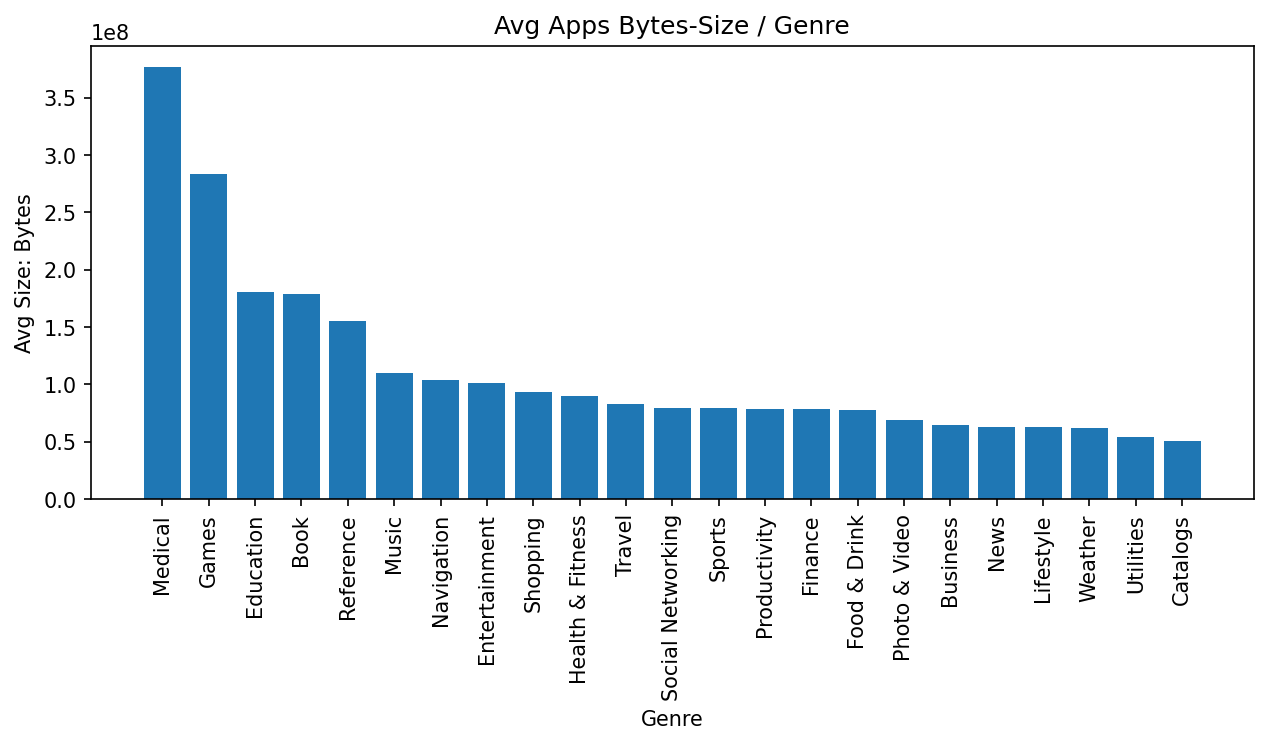

In [19]:
avg_app_size = ap.groupby('Primary_Genre')['Size_(Bytes)'].mean()
avg_app_size = avg_app_size.sort_values(ascending=False)

fig, ax = plt.subplots()
ax.bar(avg_app_size.index, avg_app_size.values)
ax.set_title('Avg Apps Bytes-Size / Genre')
ax.set_xlabel('Genre')
ax.tick_params(axis='x', labelrotation=90, labelcolor='black', direction='out')
ax.set_ylabel('Avg Size: Bytes')
plt.show()

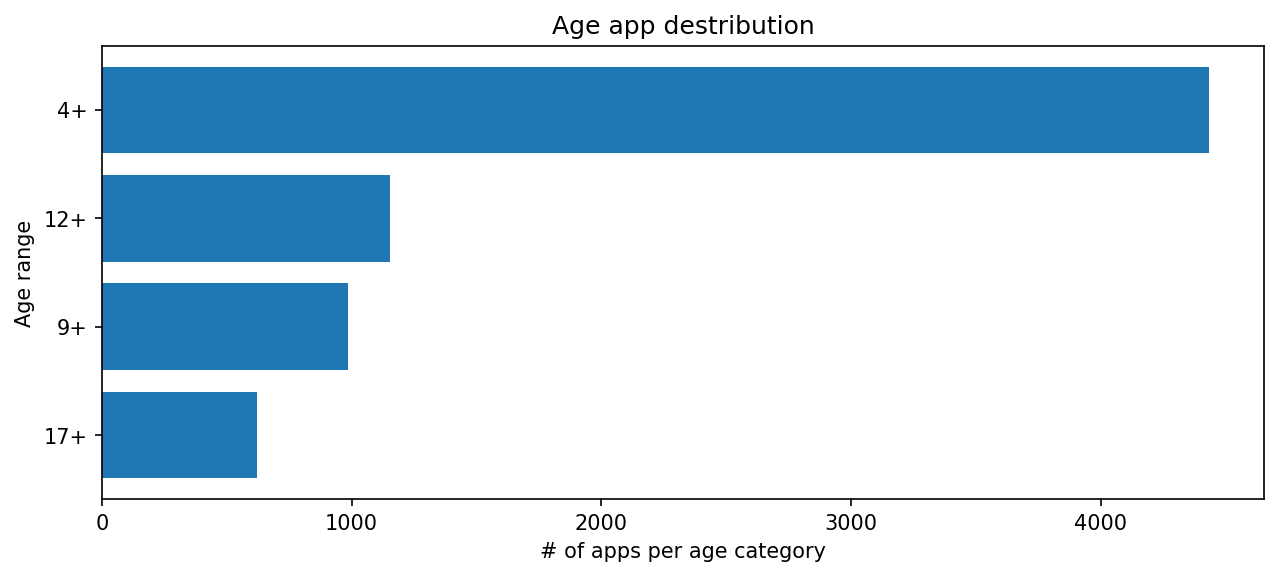

In [20]:
app_age_destribution = ap.groupby('Age_Range')['Counter'].sum()
app_age_destribution = app_age_destribution.sort_values(ascending = True)

fig, ax = plt.subplots()

ax.barh(app_age_destribution.index, app_age_destribution.values)
ax.set_ylabel('Age range')
ax.set_xlabel('# of apps per age category')
ax.set_title('Age app destribution')
plt.subplots_adjust(hspace=0.8)
plt.show()